In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

## Read the data

In [2]:
crime=pd.read_csv('../Datasets/crime_data.csv',index_col='Unnamed: 0')

In [3]:
crime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## EDA

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
crime.duplicated().sum()

0

# K-Means Clustering

In [8]:
kcrime=crime.copy()

In [9]:
kcrime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Scale the data

In [10]:
kscale=StandardScaler()

In [11]:
kscale_df=kscale.fit_transform(kcrime)
kscale_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Build the data

In [12]:
kmodel=KMeans(n_clusters=4, random_state=42)

In [13]:
kmodel.fit(kscale_df)

KMeans(n_clusters=4, random_state=42)

In [14]:
kmodel.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [15]:
kcrime['Labels']=kmodel.labels_

In [16]:
kcrime.head()

,Murder,Assault,UrbanPop,Rape,Labels
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3


In [17]:
kmodel.inertia_

57.55425863091105

## Hyperparameter tuning

In [18]:
wcss = []
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(kscale_df)
    wcss.append(model.inertia_)

In [19]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.05119672966492,
 44.09212815508051,
 40.67588479504112,
 36.073709589324494,
 31.61233134617762,
 27.525844740519272]

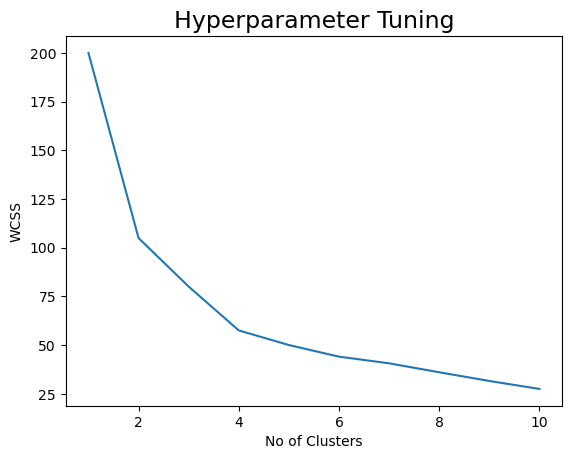

In [20]:
plt.plot(range(1,11),wcss)
plt.title('Hyperparameter Tuning', fontsize=17)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
final_model = KMeans(n_clusters=3,random_state=42)

In [22]:
final_model.fit(kscale_df)

KMeans(n_clusters=3, random_state=42)

In [23]:
final_model.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [24]:
kcrime['Labels']=final_model.labels_

In [25]:
kcrime.head()

,Murder,Assault,UrbanPop,Rape,Labels
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [26]:
grp=kcrime.groupby('Labels')

In [27]:
for x,y in grp:
    print(y)
    print('_'*60)

               Murder  Assault  UrbanPop  Rape  Labels
Connecticut       3.3      110        77  11.1       0
Delaware          5.9      238        72  15.8       0
Hawaii            5.3       46        83  20.2       0
Indiana           7.2      113        65  21.0       0
Kansas            6.0      115        66  18.0       0
Massachusetts     4.4      149        85  16.3       0
New Jersey        7.4      159        89  18.8       0
Ohio              7.3      120        75  21.4       0
Oklahoma          6.6      151        68  20.0       0
Oregon            4.9      159        67  29.3       0
Pennsylvania      6.3      106        72  14.9       0
Rhode Island      3.4      174        87   8.3       0
Utah              3.2      120        80  22.9       0
Virginia          8.5      156        63  20.7       0
Washington        4.0      145        73  26.2       0
Wyoming           6.8      161        60  15.6       0
____________________________________________________________
    

In [28]:
grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
Labels,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


# Hierarchical

In [29]:
hcrime=crime.copy()

In [30]:
hcrime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Scale the data

In [31]:
hscale=MinMaxScaler()
hscale_df=hscale.fit_transform(hcrime)
hscale_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

## Build the model

In [32]:
hmodel=AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')

In [33]:
hmodel.fit(hscale_df)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=8)

In [34]:
hmodel.labels_

array([0, 4, 3, 5, 1, 3, 7, 6, 1, 0, 7, 2, 3, 5, 2, 5, 5, 0, 2, 3, 6, 3,
       7, 0, 3, 2, 2, 1, 2, 6, 3, 3, 0, 2, 5, 5, 5, 5, 6, 0, 2, 0, 3, 7,
       2, 5, 5, 2, 7, 5], dtype=int64)

In [35]:
hcrime['labels']=hmodel.labels_

In [36]:
hcrime.head()

,Murder,Assault,UrbanPop,Rape,labels
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,1


In [37]:
hgrp=hcrime.groupby('labels')

In [38]:
for x,y in hgrp:
    print(y)
    print('_'*50)

                Murder  Assault  UrbanPop  Rape  labels
Alabama           13.2      236        58  21.2       0
Georgia           17.4      211        60  25.8       0
Louisiana         15.4      249        66  22.2       0
Mississippi       16.1      259        44  17.1       0
North Carolina    13.0      337        45  16.1       0
South Carolina    14.4      279        48  22.5       0
Tennessee         13.2      188        59  26.9       0
__________________________________________________
            Murder  Assault  UrbanPop  Rape  labels
California     9.0      276        91  40.6       1
Florida       15.4      335        80  31.9       1
Nevada        12.2      252        81  46.0       1
__________________________________________________
               Murder  Assault  UrbanPop  Rape  labels
Idaho             2.6      120        54  14.2       2
Iowa              2.2       56        57  11.3       2
Maine             2.1       83        51   7.8       2
Montana           6.0 

In [39]:
hgrp.agg('mean')

,Murder,Assault,UrbanPop,Rape
labels,,,,
0,14.671429,251.285714,54.285714,21.685714
1,12.200000,287.666667,84.000000,39.500000
2,3.180000,78.700000,49.300000,11.630000
3,10.444444,246.666667,76.444444,29.833333
4,10.000000,263.000000,48.000000,44.500000
5,6.918182,138.636364,64.636364,20.263636
6,5.275000,180.000000,83.250000,14.800000
7,3.420000,80.200000,74.400000,15.980000


## plot Dendogram

In [40]:
from scipy.cluster import hierarchy

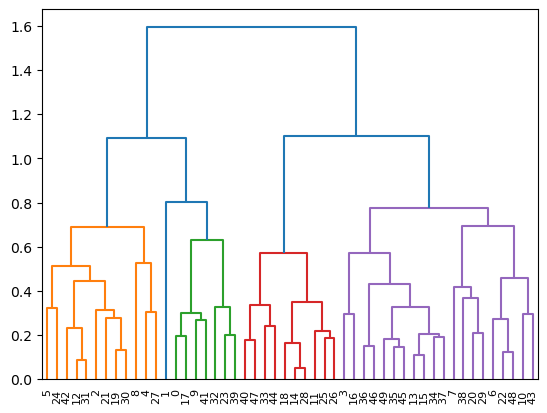

In [41]:
ln = hierarchy.linkage(hscale_df, method='complete')
dn = hierarchy.dendrogram(ln, color_threshold=0.8)

# DBSCAN

In [42]:
dcrime=crime.copy()

In [43]:
dcrime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Build the data

In [44]:
dmodel=DBSCAN(min_samples=12)

In [45]:
dmodel.fit(dcrime)

DBSCAN(min_samples=12)

In [46]:
dmodel.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [47]:
dcrime['labels']=dmodel.labels_

In [48]:
dcrime.head()

,Murder,Assault,UrbanPop,Rape,labels
Alabama,13.2,236,58,21.2,-1
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,-1
California,9.0,276,91,40.6,-1


In [49]:
dgrp=dcrime.groupby('labels')

In [50]:
for x,y in dgrp:
    print(y)
    print('_'*50)

                Murder  Assault  UrbanPop  Rape  labels
Alabama           13.2      236        58  21.2      -1
Alaska            10.0      263        48  44.5      -1
Arizona            8.1      294        80  31.0      -1
Arkansas           8.8      190        50  19.5      -1
California         9.0      276        91  40.6      -1
Colorado           7.9      204        78  38.7      -1
Connecticut        3.3      110        77  11.1      -1
Delaware           5.9      238        72  15.8      -1
Florida           15.4      335        80  31.9      -1
Georgia           17.4      211        60  25.8      -1
Hawaii             5.3       46        83  20.2      -1
Idaho              2.6      120        54  14.2      -1
Illinois          10.4      249        83  24.0      -1
Indiana            7.2      113        65  21.0      -1
Iowa               2.2       56        57  11.3      -1
Kansas             6.0      115        66  18.0      -1
Kentucky           9.7      109        52  16.3 